### UP2078876 Code File

Importing Libraries

In [60]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import plotly_express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from keras.layers import BatchNormalization, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    precision_score,
    r2_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from tensorflow.keras import backend, callbacks, layers, models
from keras.callbacks import EarlyStopping
from scipy import stats

In [61]:
warnings.filterwarnings("ignore")
%matplotlib inline

Importing dataset, removing unnecessary ID column and deleting single 'Other' gender patient (see report) 

In [62]:
path = "C:/Users/brcol/OneDrive/Documents/Data Analytics - MSc/Big Data Applications/Assignment 2/healthcare-dataset-stroke-data.csv"
data = pd.read_csv(path)
data.drop(["id"], inplace=True, axis=1)  # dropping id, not useful addition to dataset
data = data[data["gender"]!="Other"]
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Establishing the number of NaN Values, describing dataset and using a prebuilt reporting package to review.

In [63]:
data.isna().sum()  # checking for missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [64]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [65]:
pp.ProfileReport(data)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Recreating dataset to enable clearer visualisations with appropriate tagging

In [66]:
vis_data = data.copy()
vis_data['hypertension'] = np.where(vis_data['hypertension']==0, 'No Hypertension', 'Hypertension')
vis_data['heart_disease'] = np.where(vis_data['heart_disease']==1, 'Heart Disease', 'No Heart Disease')
vis_data['stroke'] = np.where(vis_data['stroke']==1, 'Stroke', 'Healthy')

Visualising data, see accompanying report.

Text(0, 0.5, 'Frequency')

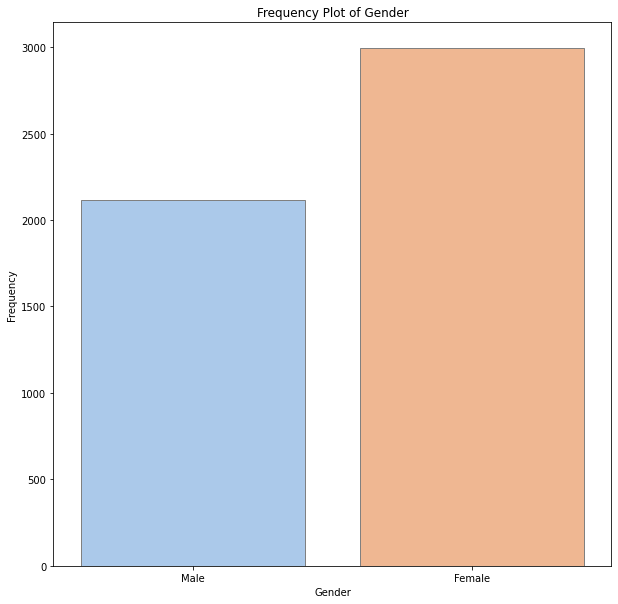

In [67]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=vis_data, x="gender", palette="pastel", edgecolor="0.5").set_title("Frequency Plot of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")

In [68]:
fig = px.histogram(vis_data, x="age", facet_row="stroke", title="Age Distribution of Stroke Dataset", nbins=20, height=800)
fig.update_layout(
    xaxis_title = "Age",
    title_x = 0.5, 
)
fig.update_yaxes(mirror=True)
fig.update_traces(opacity=0.7)
fig.show()

In [69]:
fig = px.histogram(vis_data, x="age", facet_row="gender", title="Age Distribution of Stroke Dataset", nbins=20, height=800)
fig.update_layout(
    xaxis_title = "Age",
    title_x = 0.5, 
)
fig.update_yaxes(mirror=True)
fig.update_traces(opacity=0.7)
fig.show()

Text(0, 0.5, 'Frequency')

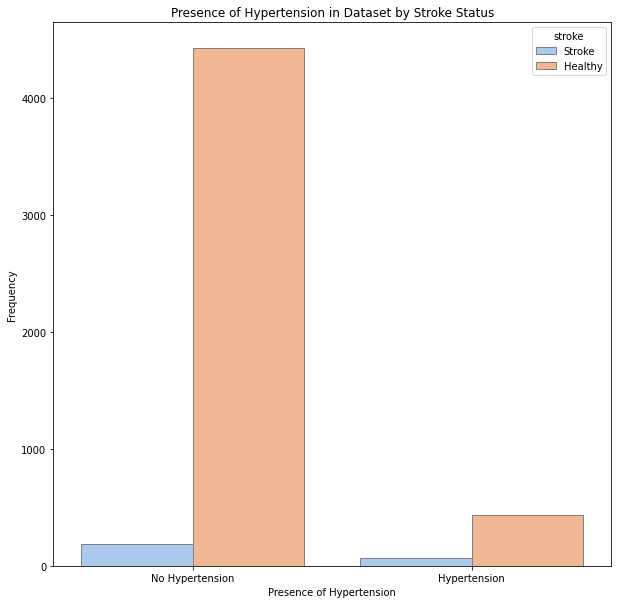

In [70]:
plt.figure(figsize=(10, 10))
sns.countplot(data=vis_data, x="hypertension", hue="stroke", palette="pastel", edgecolor="0.5").set_title("Presence of Hypertension in Dataset by Stroke Status")
plt.xlabel("Presence of Hypertension")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

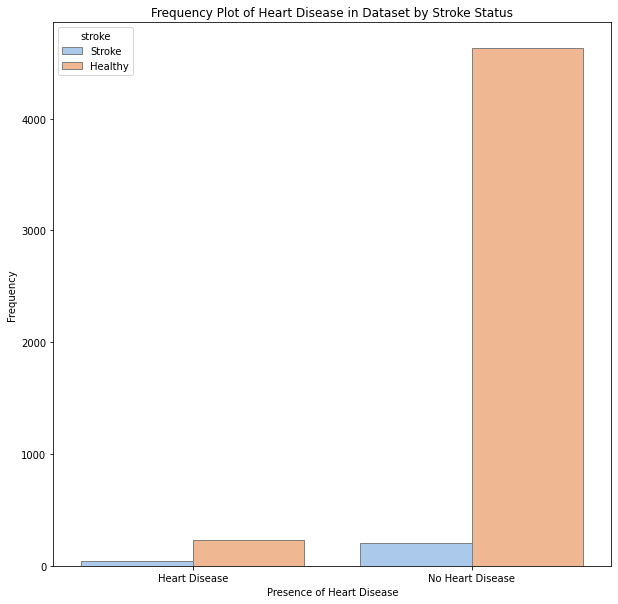

In [71]:
plt.figure(figsize=(10, 10))
sns.countplot(data=vis_data, x="heart_disease", hue="stroke", palette="pastel", edgecolor="0.5").set_title("Frequency Plot of Heart Disease in Dataset by Stroke Status")
plt.xlabel("Presence of Heart Disease")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

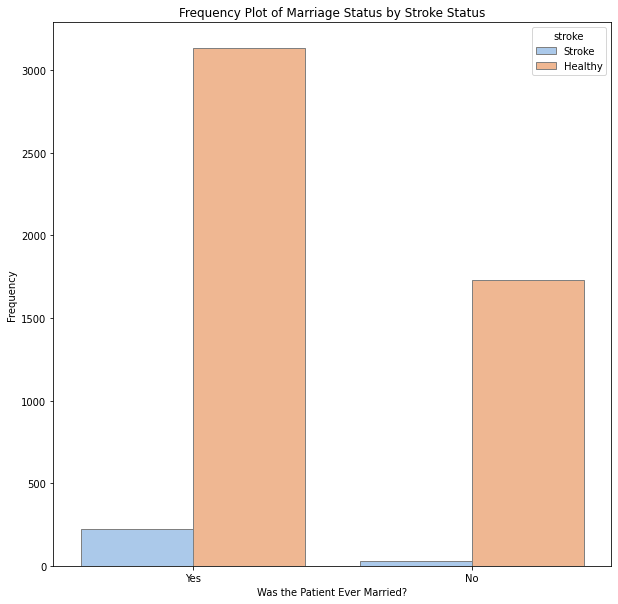

In [72]:
plt.figure(figsize=(10, 10))
sns.countplot(data=vis_data, x="ever_married", hue="stroke", palette="pastel", edgecolor="0.5").set_title("Frequency Plot of Marriage Status by Stroke Status")
plt.xlabel("Was the Patient Ever Married?")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

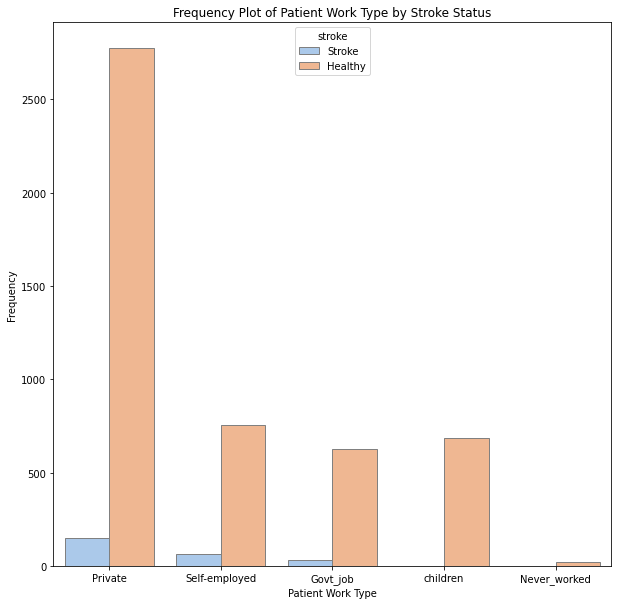

In [73]:
plt.figure(figsize=(10, 10))
sns.countplot(data=vis_data, x="work_type", hue="stroke", palette="pastel", edgecolor="0.5", orient="h").set_title("Frequency Plot of Patient Work Type by Stroke Status")
plt.xlabel("Patient Work Type")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

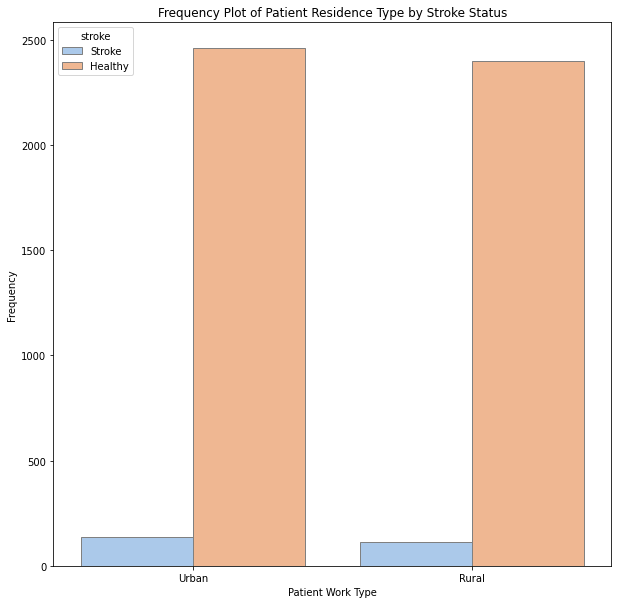

In [74]:
plt.figure(figsize=(10, 10))
sns.countplot(data=vis_data, x="Residence_type", hue="stroke", palette="pastel", edgecolor="0.5", orient="h").set_title("Frequency Plot of Patient Residence Type by Stroke Status")
plt.xlabel("Patient Work Type")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

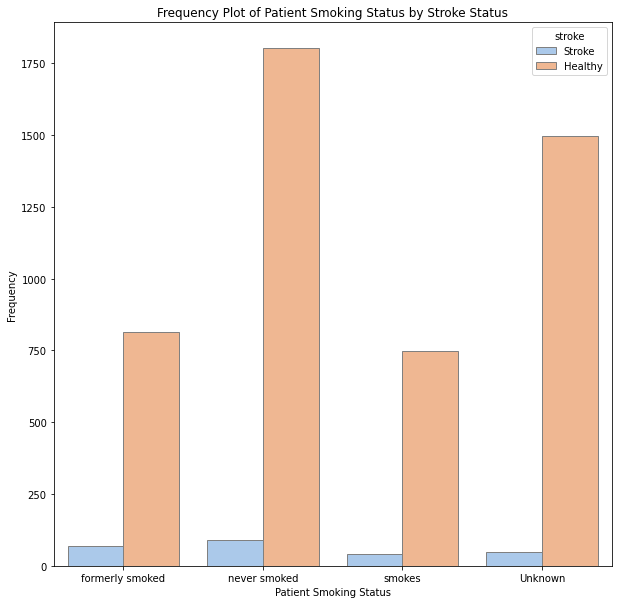

In [75]:
plt.figure(figsize=(10, 10))
sns.countplot(data=vis_data, x="smoking_status", hue="stroke", palette="pastel", edgecolor="0.5", orient="h").set_title("Frequency Plot of Patient Smoking Status by Stroke Status")
plt.xlabel("Patient Smoking Status")
plt.ylabel("Frequency")

Text(0, 0.5, 'Body Mass Index (BMI)')

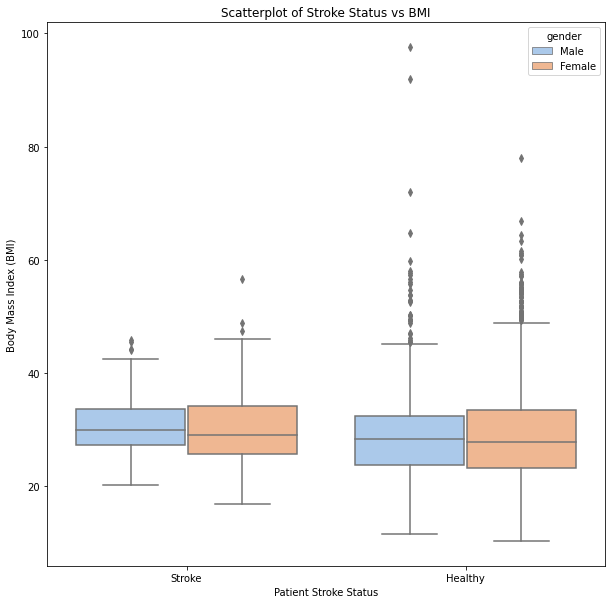

In [76]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=vis_data, x="stroke", y="bmi", hue="gender", palette="pastel").set_title(
    "Scatterplot of Stroke Status vs BMI"
)
plt.xlabel("Patient Stroke Status")
plt.ylabel("Body Mass Index (BMI)")

Text(0.5, 1.0, 'Pie Chart Illustrating Dataset Distribution of Stroke Values')

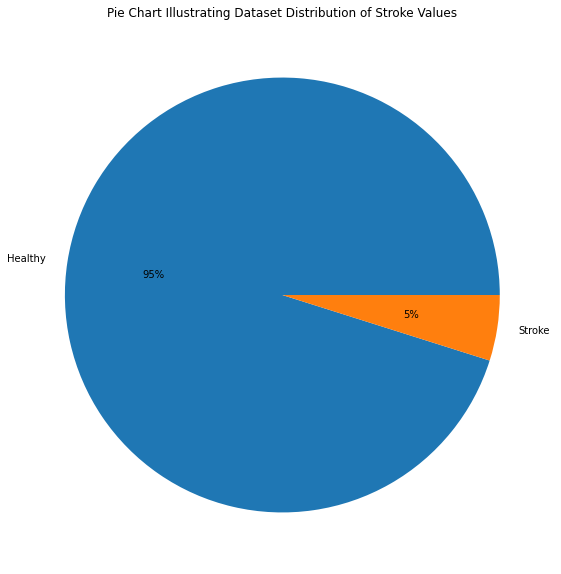

In [77]:
counts = pd.DataFrame(vis_data.stroke.value_counts())
plt.figure(figsize=(10, 10))
plt.pie(data=counts, x="stroke", labels=["Healthy", "Stroke"], autopct='%.0f%%')
plt.title("Pie Chart Illustrating Dataset Distribution of Stroke Values")

Text(0, 0.5, 'Body Mass Index (BMI)')

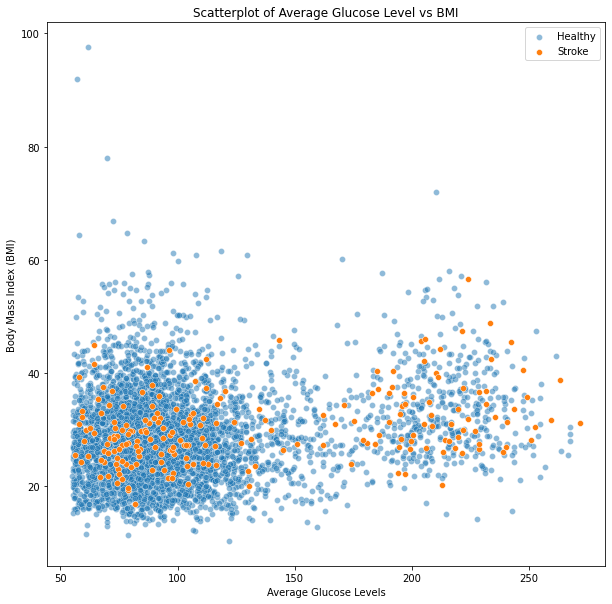

In [78]:
vis_data["alpha"] = np.where(vis_data.stroke == "Stroke", 1.0, 0.5)
plt.figure(figsize=(10, 10))
ax=sns.scatterplot(data=vis_data[vis_data.alpha == 0.5], x="avg_glucose_level", y="bmi", alpha=0.5, label="Healthy")
sns.scatterplot(data=vis_data[vis_data.alpha == 1.0], x="avg_glucose_level", y="bmi", alpha=1.0, ax=ax, label="Stroke").set_title(
    "Scatterplot of Average Glucose Level vs BMI"
)
ax.legend()
plt.xlabel("Average Glucose Levels")
plt.ylabel("Body Mass Index (BMI)")


Groupby function used in explaining value differences for variables.

In [79]:
hypertension = pd.DataFrame(vis_data.groupby(["hypertension", "stroke"]).size())
heart_disease = pd.DataFrame(vis_data.groupby(["heart_disease", "stroke"]).size())
ever_married = pd.DataFrame(vis_data.groupby(["ever_married", "stroke"]).size())
residence_type = pd.DataFrame(vis_data.groupby(["Residence_type", "stroke"]).size())
smoke_status = pd.DataFrame(vis_data.groupby(["smoking_status", "stroke"]).size())

Label encoding and scaling dataset to review correlations

In [80]:
lb_make = LabelEncoder()
data["gender"] = lb_make.fit_transform(data["gender"])
data["ever_married"] = lb_make.fit_transform(data["ever_married"])
data["work_type"] = lb_make.fit_transform(data["work_type"])
data["Residence_type"] = lb_make.fit_transform(data["Residence_type"])
data["smoking_status"] = lb_make.fit_transform(data["smoking_status"])

In [81]:
scaler = MinMaxScaler()
for_scaling = data[['age', 'avg_glucose_level', 'bmi']]
data.drop(['age', 'avg_glucose_level', 'bmi'], inplace=True, axis=1)
for_scaling = pd.DataFrame(scaler.fit_transform(for_scaling), columns = for_scaling.columns)
data = pd.concat([data, for_scaling], axis=1)

In [82]:
sw_data = data.copy()
sw_data.bmi = sw_data.bmi.fillna(sw_data.bmi.mean()) 
shapiro_test_glucose = stats.shapiro(sw_data["avg_glucose_level"])
shapiro_test_bmi = stats.shapiro(sw_data["bmi"])
shapiro_test_age = stats.shapiro(sw_data["age"])
print(f"Avg Glucose Level SW test results: ", shapiro_test_glucose)
print(f"BMI SW test results: ", shapiro_test_bmi)
print(f"Age SW test results: ", shapiro_test_age)

Avg Glucose Level SW test results:  ShapiroResult(statistic=nan, pvalue=1.0)
BMI SW test results:  ShapiroResult(statistic=0.9516774415969849, pvalue=4.3014983533519105e-38)
Age SW test results:  ShapiroResult(statistic=nan, pvalue=1.0)


Plotting correlation matrix

Text(0.5, 1.0, 'Correlation Between Numberical Variables in Stroke Datset')

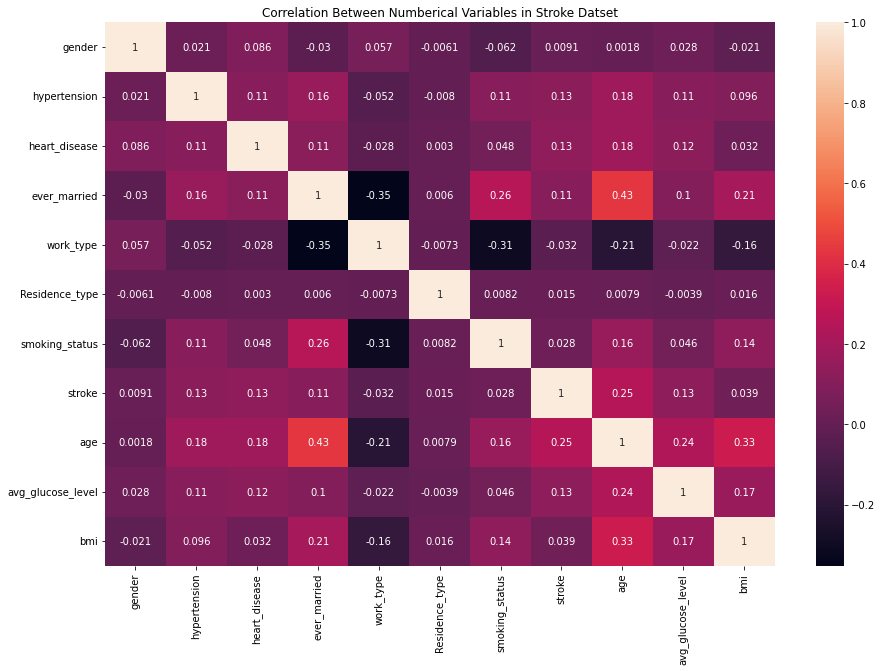

In [83]:
plt.figure(figsize=(15, 10))
corr = sw_data.corr()
sns.heatmap(corr, annot=True).set_title(
    "Correlation Between Numberical Variables in Stroke Datset"
)

Creating correlation bar chart

<AxesSubplot:xlabel='Correlation_Coef', ylabel='Predictor'>

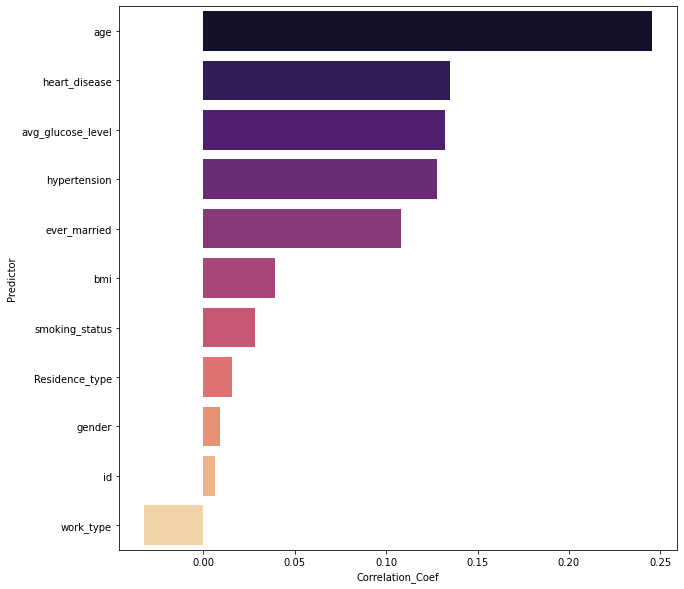

In [84]:
corr_data = pd.read_csv(path)
corr_data.bmi = corr_data.bmi.fillna(corr_data.bmi.mean()) 
corr_data["gender"] = lb_make.fit_transform(corr_data["gender"])
corr_data["ever_married"] = lb_make.fit_transform(corr_data["ever_married"])
corr_data["work_type"] = lb_make.fit_transform(corr_data["work_type"])
corr_data["Residence_type"] = lb_make.fit_transform(corr_data["Residence_type"])
corr_data["smoking_status"] = lb_make.fit_transform(corr_data["smoking_status"])

predictors = corr_data.columns.tolist()
predictors.remove("stroke")

corr_list = []
for predictor in predictors:
    var_1 = corr_data[predictor]
    var_2 = corr_data["stroke"]
    corr = np.corrcoef(var_1, var_2)[1][0]
    results = {"Predictor":predictor, "Correlation_Coef": corr}
    corr_list.append(results)
correlations= pd.DataFrame(corr_list)
correlations.sort_values("Correlation_Coef", ascending=False, inplace=True)

plt.figure(figsize=(10, 10))
sns.barplot(data=correlations, y="Predictor", x="Correlation_Coef", palette="magma", orient="h", order=correlations.sort_values("Correlation_Coef", ascending=False).Predictor)

## Starting Model Construction

Creating fresh dataset for model use only

In [85]:
model_data = pd.read_csv(path)

model_data.drop(["id"], inplace=True, axis=1)  # dropping id, not useful addition to dataset
model_data = model_data[model_data["gender"]!="Other"]

model_data["gender"] = lb_make.fit_transform(model_data["gender"])
model_data["ever_married"] = lb_make.fit_transform(model_data["ever_married"])
model_data["work_type"] = lb_make.fit_transform(model_data["work_type"])
model_data["Residence_type"] = lb_make.fit_transform(model_data["Residence_type"])
model_data["smoking_status"] = lb_make.fit_transform(model_data["smoking_status"])

model_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [86]:
imputer = KNNImputer(n_neighbors=2)
data_imputed = pd.DataFrame(imputer.fit_transform(model_data))
data_imputed.columns = model_data.columns

stroke_values_imputed = data_imputed["stroke"]
data_imputed = data_imputed.drop("stroke", axis=1)

Creating dataset with NaN values dropped

In [87]:
data_dropped = model_data
data_dropped = data_dropped[~data_dropped["bmi"].isna()]
dropped_stroke_values = data_dropped["stroke"]
dropped_data = data_dropped.drop("stroke", axis=1)

Creating dataset with NaN values replaced by column mean

In [88]:
data_mean = model_data
data_mean["bmi"] = data_mean["bmi"].fillna(data_mean["bmi"].mean())
mean_stroke_values = data_mean["stroke"]
mean_data = data_mean.drop("stroke", axis=1)

Defining a function to make scaling values after T/T split easier

In [89]:
def scale_values(x_train, x_test):
    scaler = MinMaxScaler()
    for_scaling_train = x_train[["age", "avg_glucose_level", "bmi"]]
    for_scaling_test = x_test[["age", "avg_glucose_level", "bmi"]]
    x_train.drop(["age", "avg_glucose_level", "bmi"], inplace=True, axis=1)
    x_test.drop(["age", "avg_glucose_level", "bmi"], inplace=True, axis=1)
    for_scaling_test = pd.DataFrame(
        scaler.fit_transform(for_scaling_test), columns=for_scaling_test.columns
    )
    for_scaling_train = pd.DataFrame(
        scaler.fit_transform(for_scaling_train), columns=for_scaling_train.columns
    )
    list_of_dfs = [x_train, x_test, for_scaling_train, for_scaling_test]
    [df.reset_index(inplace=True, drop=True) for df in list_of_dfs]
    x_train = pd.concat([x_train, for_scaling_train], axis=1)
    x_test = pd.concat([x_test, for_scaling_test], axis=1)
    return x_train, x_test

Creating T/T splits for each dataset and then applying scaling function

In [90]:
x_train_imputed, x_test_imputed, y_train_imputed, y_test_imputed = split(data_imputed, stroke_values_imputed, test_size=0.3)
(x_train_imputed, x_test_imputed) = scale_values(x_train_imputed, x_test_imputed)

In [91]:
x_train_dropped, x_test_dropped, y_train_dropped, y_test_dropped = split(dropped_data, dropped_stroke_values, test_size=0.3)
(x_train_dropped, x_test_dropped) = scale_values(x_train_dropped, x_test_dropped)

In [92]:
x_train_mean, x_test_mean, y_train_mean, y_test_mean = split(mean_data, mean_stroke_values, test_size=0.3)
(x_train_mean, x_test_mean) = scale_values(x_train_mean, x_test_mean)

Creating DFNN function

In [93]:
def create_model(
    model_x_train,
    model_y_train,
    model_x_test,
    model_y_test,
    epochs,
    batch_size,
    activation,
):
    model = models.Sequential()
    model.add(layers.Dense(512, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(layers.Dense(512, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    callbacks_list = [callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3)]
    model.fit(
        model_x_train,
        model_y_train,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks_list,
        validation_data=(model_x_test, model_y_test),
    )
    return model

Creating DFNN threshold optimisation function

In [137]:
def model_results(model, results_x_test, results_y_test, title):
    results = model.evaluate(results_x_test, results_y_test, batch_size=20)
    print("test loss, test acc:", results)

    predictions = model.predict(results_x_test)
    score=[]
    thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for num in thresholds:
        rounded_preds = np.where(predictions > num, 1, 0)
        f1_score_new = f1_score(results_y_test, rounded_preds)
        score.append(f1_score_new)
        
    num_df = pd.DataFrame(thresholds)
    num_df.rename(columns={0:"Threshold"}, inplace=True)
    score_df = pd.DataFrame(score)
    score_df.rename(columns={0:"f1-Score"}, inplace=True)
    output = pd.concat([num_df, score_df], axis=1)
    return output

Training model with imputed dataset

In [95]:
model1 = create_model(x_train_imputed, y_train_imputed, x_test_imputed, y_test_imputed, 10, 5, "relu")
model1

Epoch 1/10
716/716 [==============================] - 2s 2ms/step - loss: 0.2786 - accuracy: 0.9010 - val_loss: 0.2669 - val_accuracy: 0.9074 - lr: 0.0010
Epoch 2/10
716/716 [==============================] - 1s 2ms/step - loss: 0.2135 - accuracy: 0.9430 - val_loss: 0.2891 - val_accuracy: 0.8956 - lr: 0.0010
Epoch 3/10
716/716 [==============================] - 2s 2ms/step - loss: 0.1920 - accuracy: 0.9474 - val_loss: 0.1782 - val_accuracy: 0.9472 - lr: 0.0010
Epoch 4/10
716/716 [==============================] - 1s 2ms/step - loss: 0.1935 - accuracy: 0.9460 - val_loss: 0.2353 - val_accuracy: 0.9217 - lr: 0.0010
Epoch 5/10
716/716 [==============================] - 2s 2ms/step - loss: 0.1874 - accuracy: 0.9477 - val_loss: 0.1794 - val_accuracy: 0.9504 - lr: 0.0010
Epoch 6/10
716/716 [==============================] - 1s 2ms/step - loss: 0.1853 - accuracy: 0.9469 - val_loss: 0.1849 - val_accuracy: 0.9472 - lr: 0.0010
Epoch 7/10
716/716 [==============================] - 2s 2ms/step - lo

In [138]:
model_results(
    model1,
    x_test_imputed,
    y_test_imputed,
    "Classification Matrix for Model Trained on Data (NaN BMI Values Imputed)",
)

77/77 [==============================] - 0s 1ms/step - loss: 0.1645 - accuracy: 0.9478
test loss, test acc: [0.16448330879211426, 0.9478147625923157]


,Threshold,f1-Score
0,0.1,0.238342
1,0.2,0.170732
2,0.3,0.098039
3,0.4,0.022222
4,0.5,0.024390
5,0.6,0.000000
6,0.7,0.000000
7,0.8,0.000000
8,0.9,0.000000


In [182]:
def model_output(model, results_x_test, results_y_test, title, threshold):
    predictions = model.predict(results_x_test)
    threshold_rounded_preds = np.where(predictions > threshold, 1, 0)

    conf_matrix = confusion_matrix(results_y_test, threshold_rounded_preds)

    accuracy = accuracy_score(results_y_test, threshold_rounded_preds)
    precision = precision_score(results_y_test, threshold_rounded_preds)
    recall = recall_score(results_y_test, threshold_rounded_preds)
    score = f1_score(results_y_test, threshold_rounded_preds)

    base_rounded_preds = np.where(predictions > 0.5, 1, 0)
    base_accuracy = accuracy_score(results_y_test, base_rounded_preds)
    base_precision = precision_score(results_y_test, base_rounded_preds)
    base_recall = recall_score(results_y_test, base_rounded_preds)
    base_score = f1_score(results_y_test, base_rounded_preds)

    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.xlabel("Predicted Value")
    sns.heatmap(conf_matrix, annot=True, fmt="d")

    print(f"New model accuracy is: ",accuracy)
    print(f"Change in model accuracy with updated threshold: ", accuracy-base_accuracy)
    print(f"New model precision is: ",precision)
    print(f"Change in model precision with updated threshold: ", precision-base_precision)
    print(f"New model recall is: ",recall)
    print(f"Change in model recall with updated threshold: ", recall-base_recall)
    print(f"New model f1-Score is: ",score)
    print(f"Change in model f1-score with updated threshold: ", score-base_score)

    

77/77 [==============================] - 0s 1ms/step - loss: 0.1645 - accuracy: 0.9478
test loss, test acc: [0.16448330879211426, 0.9478147625923157]
Change in model accuracy with updated threshold:  -0.1395955642530985
Change in model precision with updated threshold:  0.03585374511892084
Change in model recall with updated threshold:  0.6164383561643836
Change in model f1-score with updated threshold:  0.21395172500947807


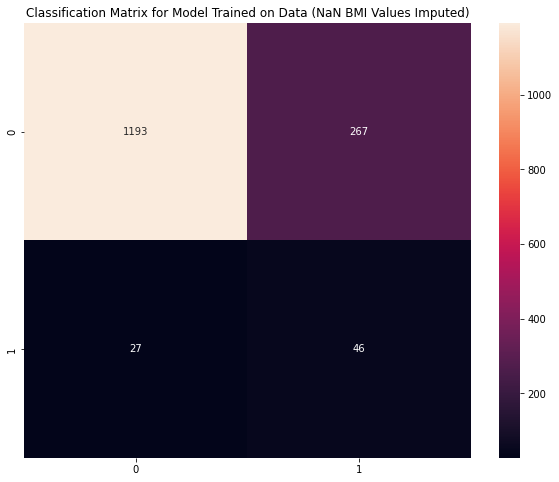

In [172]:
model_output(
    model1,
    x_test_imputed,
    y_test_imputed,
    "Classification Matrix for Model Trained on Data (NaN BMI Values Imputed)",
    0.1
)

Creating DFNN with NaN BMI values dropped dataset

In [98]:
model2 = create_model(
    x_train_dropped, y_train_dropped, x_test_dropped, y_test_dropped, 10, 5, "relu"
)

Epoch 1/10
687/687 [==============================] - 2s 2ms/step - loss: 0.2640 - accuracy: 0.9109 - val_loss: 0.3417 - val_accuracy: 0.8785 - lr: 0.0010
Epoch 2/10
687/687 [==============================] - 1s 2ms/step - loss: 0.1881 - accuracy: 0.9520 - val_loss: 0.1887 - val_accuracy: 0.9504 - lr: 0.0010 - accu
Epoch 3/10
687/687 [==============================] - 1s 2ms/step - loss: 0.1740 - accuracy: 0.9552 - val_loss: 0.1864 - val_accuracy: 0.9532 - lr: 0.0010
Epoch 4/10
687/687 [==============================] - 1s 2ms/step - loss: 0.1721 - accuracy: 0.9531 - val_loss: 0.1835 - val_accuracy: 0.9552 - lr: 0.0010
Epoch 5/10
687/687 [==============================] - 1s 2ms/step - loss: 0.1605 - accuracy: 0.9552 - val_loss: 0.1885 - val_accuracy: 0.9525 - lr: 0.0010 accuracy: 0. - ETA: 0s - loss: 0.1597 - accura
Epoch 6/10
687/687 [==============================] - 1s 2ms/step - loss: 0.1655 - accuracy: 0.9543 - val_loss: 0.1735 - val_accuracy: 0.9566 - lr: 0.0010
Epoch 7/10
687/6

In [139]:
model_results(
    model2,
    x_test_dropped,
    y_test_dropped,
    "Classification Matrix for Model Trained on Data (NaN BMI values dropped)",
)

74/74 [==============================] - 0s 952us/step - loss: 0.1635 - accuracy: 0.9552
test loss, test acc: [0.1634702831506729, 0.9551934599876404]


,Threshold,f1-Score
0,0.1,0.193277
1,0.2,0.185430
2,0.3,0.208696
3,0.4,0.159091
4,0.5,0.083333
5,0.6,0.000000
6,0.7,0.000000
7,0.8,0.000000
8,0.9,0.000000


74/74 [==============================] - 0s 1ms/step - loss: 0.1635 - accuracy: 0.9552
test loss, test acc: [0.1634702831506729, 0.9551934599876404]
New model accuracy is:  0.9382213170400543
Change in model accuracy with updated threshold:  -0.0169721656483367
New model precision is:  0.23076923076923078
Change in model precision with updated threshold:  -0.10256410256410253
New model recall is:  0.19047619047619047
Change in model recall with updated threshold:  0.14285714285714285
New model f1-Score is:  0.20869565217391306
Change in model f1-score with updated threshold:  0.12536231884057975


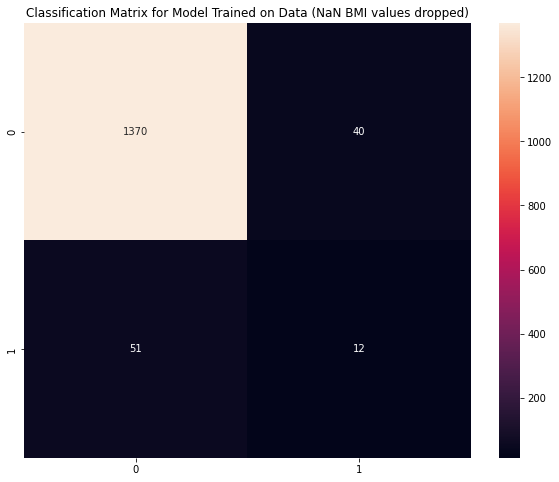

In [178]:
model_output(
    model2,
    x_test_dropped,
    y_test_dropped,
    "Classification Matrix for Model Trained on Data (NaN BMI values dropped)",
    0.3
)

Creating DFNN model using mean dataset

In [100]:
model3 = create_model(
    x_train_mean, y_train_mean, x_test_mean, y_test_mean, 10, 5, "relu"
)

Epoch 1/10
716/716 [==============================] - 2s 2ms/step - loss: 0.2648 - accuracy: 0.9072 - val_loss: 0.2605 - val_accuracy: 0.9289 - lr: 0.0010
Epoch 2/10
716/716 [==============================] - 2s 2ms/step - loss: 0.2110 - accuracy: 0.9421 - val_loss: 0.2102 - val_accuracy: 0.9426 - lr: 0.0010
Epoch 3/10
716/716 [==============================] - 2s 2ms/step - loss: 0.1917 - accuracy: 0.9480 - val_loss: 0.2796 - val_accuracy: 0.8819 - lr: 0.0010
Epoch 4/10
716/716 [==============================] - 2s 2ms/step - loss: 0.1868 - accuracy: 0.9469 - val_loss: 0.1952 - val_accuracy: 0.9432 - lr: 0.0010
Epoch 5/10
716/716 [==============================] - 2s 2ms/step - loss: 0.1781 - accuracy: 0.9485 - val_loss: 0.1933 - val_accuracy: 0.9498 - lr: 0.0010
Epoch 6/10
716/716 [==============================] - 2s 2ms/step - loss: 0.1823 - accuracy: 0.9491 - val_loss: 0.2078 - val_accuracy: 0.9446 - lr: 0.0010
Epoch 7/10
716/716 [==============================] - 2s 2ms/step - lo

In [164]:
model_results(
    model3,
    x_test_mean,
    y_test_mean,
    "Classification Matrix for Model Trained on Data (NaN BMI Values Replaced with Col Mean)",
)

77/77 [==============================] - 0s 959us/step - loss: 0.1981 - accuracy: 0.9478
test loss, test acc: [0.19808988273143768, 0.9478147625923157]


,Threshold,f1-Score
0,0.1,0.134228
1,0.2,0.148148
2,0.3,0.156522
3,0.4,0.108696
4,0.5,0.047619
5,0.6,0.025000
6,0.7,0.000000
7,0.8,0.000000
8,0.9,0.000000


77/77 [==============================] - 0s 1ms/step - loss: 0.1981 - accuracy: 0.9478
test loss, test acc: [0.19808988273143768, 0.9478147625923157]
Change in model accuracy with updated threshold:  -0.01108936725375087
Change in model precision with updated threshold:  -0.04887218045112782
Change in model recall with updated threshold:  0.09090909090909091
Change in model f1-score with updated threshold:  0.10890269151138715


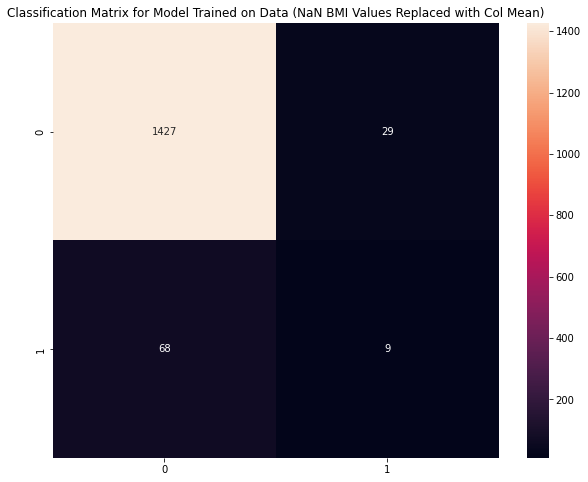

In [168]:
model_output(
    model3,
    x_test_mean,
    y_test_mean,
    "Classification Matrix for Model Trained on Data (NaN BMI Values Replaced with Col Mean)",
    0.3
)

High accuracy, but models predicting almost all negative values due to datset imbalance. Will create two new datasets with SMOTE Oversampling and Random Undersampling. Will be based on NaN values replaced with col mean in both cases.

Oversampling should be applied after T/T split, however have tried this and small number of values is leading to a very small number of positive values in training dataset. Lack of variability leading to model accuracy reduction.

In [191]:
oversampled_y = mean_stroke_values
oversampled_x = mean_data

sm = SMOTE(random_state=27)
oversampled_x, oversampled_y = sm.fit_resample(oversampled_x, oversampled_y)

(oversampled_x_train,oversampled_x_test,oversampled_y_train,oversampled_y_test) = split(oversampled_x, oversampled_y, test_size=0.5)

(oversampled_x_train, oversampled_x_test) = scale_values(oversampled_x_train, oversampled_x_test)

In [103]:
undersampled_y = mean_stroke_values
undersampled_x = mean_data

rus = RandomUnderSampler(random_state=0)
undersampled_x, undersampled_y = rus.fit_resample(undersampled_x, undersampled_y)

(undersampled_x_train,undersampled_x_test,undersampled_y_train,undersampled_y_test,) = split(undersampled_x, undersampled_y, test_size=0.3)

Creating DFNN models with newly created datasets

In [192]:
model4 = create_model(
    oversampled_x_train,
    oversampled_y_train,
    oversampled_x_test,
    oversampled_y_test,
    25,
    5,
    "relu",
)


Epoch 1/25
972/972 [==============================] - 3s 3ms/step - loss: 0.5917 - accuracy: 0.7282 - val_loss: 0.5437 - val_accuracy: 0.7265 - lr: 0.0010
Epoch 2/25
972/972 [==============================] - 2s 2ms/step - loss: 0.5298 - accuracy: 0.7420 - val_loss: 0.4206 - val_accuracy: 0.8202 - lr: 0.0010
Epoch 3/25
972/972 [==============================] - 2s 2ms/step - loss: 0.5099 - accuracy: 0.7568 - val_loss: 0.4221 - val_accuracy: 0.8093 - lr: 0.0010
Epoch 4/25
972/972 [==============================] - 2s 2ms/step - loss: 0.4815 - accuracy: 0.7778 - val_loss: 0.3991 - val_accuracy: 0.8179 - lr: 0.0010
Epoch 5/25
972/972 [==============================] - 2s 2ms/step - loss: 0.4874 - accuracy: 0.7634 - val_loss: 0.4337 - val_accuracy: 0.8138 - lr: 0.0010
Epoch 6/25
972/972 [==============================] - 2s 2ms/step - loss: 0.4951 - accuracy: 0.7667 - val_loss: 0.3984 - val_accuracy: 0.8272 - lr: 0.0010
Epoch 7/25
972/972 [==============================] - 2s 2ms/step - lo

In [193]:
model_results(
    model4,
    oversampled_x_test,
    oversampled_y_test,
    "Classification Matrix for Model Trained on Oversampled Data (NaN val replaced with col mean)",
)

243/243 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8321
test loss, test acc: [0.37599924206733704, 0.8320987820625305]


,Threshold,f1-Score
0,0.1,0.767286
1,0.2,0.799251
2,0.3,0.826212
3,0.4,0.837665
4,0.5,0.838480
5,0.6,0.832638
6,0.7,0.798301
7,0.8,0.728215
8,0.9,0.573733


New model accuracy is:  0.8320987654320988
Change in model accuracy with updated threshold:  0.0
New model precision is:  0.8037950664136623
Change in model precision with updated threshold:  0.0
New model recall is:  0.8762929251137774
Change in model recall with updated threshold:  0.0
New model f1-Score is:  0.8384798099762472
Change in model f1-score with updated threshold:  0.0


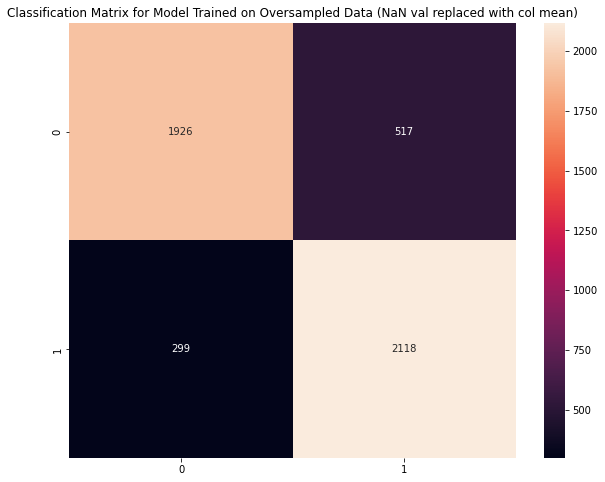

In [194]:
model_output(
    model4,
    oversampled_x_test,
    oversampled_y_test,
    "Classification Matrix for Model Trained on Oversampled Data (NaN val replaced with col mean)",
    0.5
)

In [106]:
model5 = create_model(
    undersampled_x_train,
    undersampled_y_train,
    undersampled_x_test,
    undersampled_y_test,
    30,
    2,
    "relu",
)


Epoch 1/30
174/174 [==============================] - 1s 2ms/step - loss: 0.9390 - accuracy: 0.6322 - val_loss: 0.5336 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 2/30
174/174 [==============================] - 0s 2ms/step - loss: 0.7772 - accuracy: 0.5805 - val_loss: 0.6045 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 3/30
174/174 [==============================] - 0s 2ms/step - loss: 0.7196 - accuracy: 0.6121 - val_loss: 0.4468 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 4/30
174/174 [==============================] - 0s 2ms/step - loss: 0.7272 - accuracy: 0.6063 - val_loss: 0.4995 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 5/30
174/174 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6322 - val_loss: 0.5593 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 6/30
174/174 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.5862 - val_loss: 0.5986 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 7/30
174/174 [==============================] - 0s 2ms/step - lo

In [148]:
model_results(
    model5,
    undersampled_x_test,
    undersampled_y_test,
    "Classification Matrix for Model Trained on Random Undersampled Data (NaN val replaced with col mean)",
)

8/8 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.7667
test loss, test acc: [0.45828863978385925, 0.7666666507720947]


,Threshold,f1-Score
0,0.1,0.725389
1,0.2,0.738636
2,0.3,0.784810
3,0.4,0.761905
4,0.5,0.744526
5,0.6,0.757576
6,0.7,0.734375
7,0.8,0.672414
8,0.9,0.484211


8/8 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.7667
test loss, test acc: [0.45828863978385925, 0.7666666507720947]
Change in model accuracy with updated threshold:  0.0
Change in model precision with updated threshold:  -0.03392130257801895
Change in model recall with updated threshold:  0.07142857142857151
Change in model f1-score with updated threshold:  0.01737921445950641


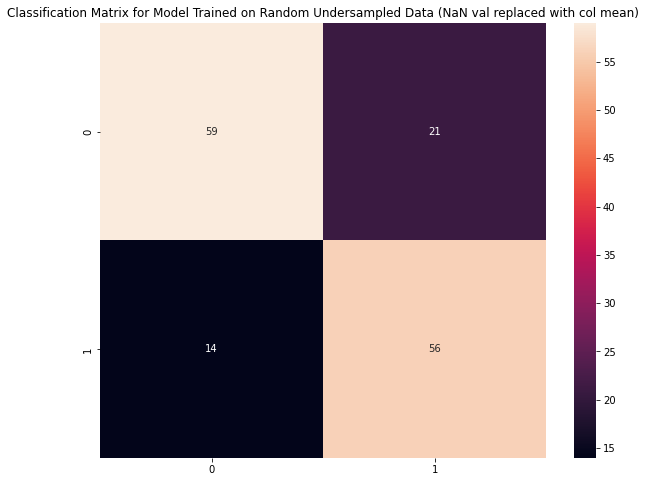

In [170]:
model_output(
    model5,
    undersampled_x_test,
    undersampled_y_test,
    "Classification Matrix for Model Trained on Random Undersampled Data (NaN val replaced with col mean)",
    0.4
)

Setting up a new dataset using One-hot encoding with SMOTE oversampling to compare to label encoded dataset

In [108]:
data_onehot = pd.read_csv(path)
data_onehot_x = data_onehot.drop("stroke", axis=1)
data_onehot_y = data_onehot["stroke"]
encoder = OneHotEncoder(handle_unknown="ignore")
cols = [
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "work_type",
    "Residence_type",
    "smoking_status",
]
cont_cols = data_onehot_x[["age", "bmi", "avg_glucose_level"]]
cont_cols["bmi"] = cont_cols["bmi"].fillna(cont_cols["bmi"].mean())
data_onehot_x_oh = pd.DataFrame(encoder.fit_transform(data_onehot_x[cols]).toarray())
data_onehot_x = pd.concat([data_onehot_x_oh, cont_cols], axis=1)


(mean_oh_x_train, mean_oh_x_test, mean_oh_y_train, mean_oh_y_test) = split(data_onehot_x, data_onehot_y)
(mean_oh_x_train, mean_oh_x_test) = scale_values(mean_oh_x_train, mean_oh_x_test)
mean_oh_x_train, mean_oh_y_train = sm.fit_resample(mean_oh_x_train, mean_oh_y_train)

Creating DFNN with One-hot encoded dataset

In [109]:
model6 = create_model(
    mean_oh_x_train, mean_oh_y_train, mean_oh_x_test, mean_oh_y_test, 25, 5, "relu"
)

Epoch 1/25
1457/1457 [==============================] - 4s 2ms/step - loss: 0.6009 - accuracy: 0.7187 - val_loss: 0.5363 - val_accuracy: 0.7488 - lr: 0.0010
Epoch 2/25
1457/1457 [==============================] - 3s 2ms/step - loss: 0.5162 - accuracy: 0.7534 - val_loss: 0.5907 - val_accuracy: 0.7152 - lr: 0.0010
Epoch 3/25
1457/1457 [==============================] - 3s 2ms/step - loss: 0.4950 - accuracy: 0.7629 - val_loss: 0.5885 - val_accuracy: 0.7606 - lr: 0.0010
Epoch 4/25
1457/1457 [==============================] - 3s 2ms/step - loss: 0.4756 - accuracy: 0.7777 - val_loss: 0.5968 - val_accuracy: 0.7363 - lr: 0.0010
Epoch 5/25
1457/1457 [==============================] - 3s 2ms/step - loss: 0.4459 - accuracy: 0.7974 - val_loss: 0.5196 - val_accuracy: 0.7621 - lr: 1.0000e-04
Epoch 6/25
1457/1457 [==============================] - 3s 2ms/step - loss: 0.4354 - accuracy: 0.8053 - val_loss: 0.5320 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 7/25
1457/1457 [============================

In [155]:
model_results(
    model6,
    mean_oh_x_test,
    mean_oh_y_test,
    "Classification Matrix Using One-Hot Encoded Data (SMOTE Scaling, NaN val replaced with col mean)",
)

64/64 [==============================] - 0s 952us/step - loss: 0.5424 - accuracy: 0.7512
test loss, test acc: [0.5423529148101807, 0.751173734664917]


,Threshold,f1-Score
0,0.1,0.132132
1,0.2,0.143369
2,0.3,0.155419
3,0.4,0.159453
4,0.5,0.180412
5,0.6,0.167702
6,0.7,0.153285
7,0.8,0.156098
8,0.9,0.157480


64/64 [==============================] - 0s 975us/step - loss: 0.5424 - accuracy: 0.7512
test loss, test acc: [0.5423529148101807, 0.751173734664917]
Change in model accuracy with updated threshold:  0.0
Change in model precision with updated threshold:  0.0
Change in model recall with updated threshold:  0.0
Change in model f1-score with updated threshold:  0.0


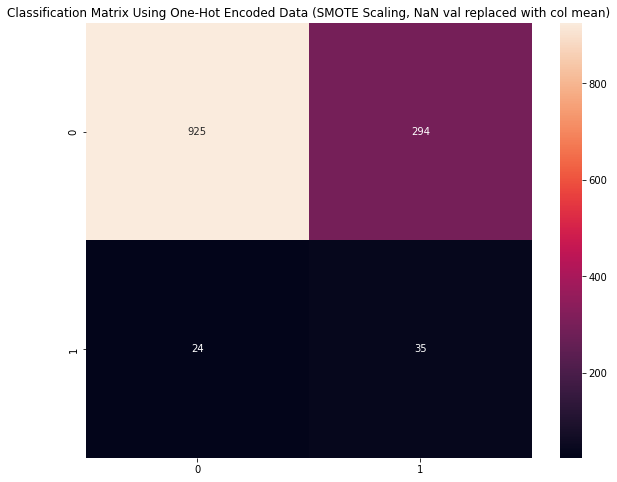

In [171]:
model_output(
    model6,
    mean_oh_x_test,
    mean_oh_y_test,
    "Classification Matrix Using One-Hot Encoded Data (SMOTE Scaling, NaN val replaced with col mean)",
    0.5
)

## Creating a CNN Model Function

In [111]:
def create_cnn_model(
    model_x_train,
    model_y_train,
    model_x_test,
    model_y_test,
    epochs,
    batch_size,
    activation,
):
    model = models.Sequential()
    model.add(layers.Dense(512, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(layers.Lambda(lambda x: backend.expand_dims(x, axis=-1)))
    model.add(layers.Conv1D(kernel_size=3, filters=5))
    model.add(BatchNormalization())
    model.add(layers.Dense(512, activation=activation))
    model.add(BatchNormalization())
    model.add(layers.Conv1D(kernel_size=3, filters=5))
    model.add(BatchNormalization())
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    callbacks_list = [callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3)]
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1),
    model.fit(
        model_x_train,
        model_y_train,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[callbacks_list, es],
        validation_data=(model_x_test, model_y_test),
    )
    return model

Running CNN model on both Over and Undersampled Data

In [112]:
cnn_model1 = create_cnn_model(
    oversampled_x_train, oversampled_y_train, oversampled_x_test, oversampled_y_test, 25, 5, "relu"
)

Epoch 1/25
1361/1361 [==============================] - 41s 30ms/step - loss: 0.5633 - accuracy: 0.7137 - val_loss: 0.4540 - val_accuracy: 0.7921 - lr: 0.0010
Epoch 2/25
1361/1361 [==============================] - 39s 28ms/step - loss: 0.5187 - accuracy: 0.7566 - val_loss: 0.4407 - val_accuracy: 0.8024 - lr: 0.0010
Epoch 00002: early stopping


In [113]:
cnn_model2 = create_cnn_model(
    undersampled_x_train,undersampled_y_train,undersampled_x_test,undersampled_y_test,25,5,"relu",
)

Epoch 1/25
70/70 [==============================] - 3s 29ms/step - loss: 0.6800 - accuracy: 0.5983 - val_loss: 0.6896 - val_accuracy: 0.5197 - lr: 0.0010
Epoch 2/25
70/70 [==============================] - 2s 27ms/step - loss: 0.6090 - accuracy: 0.6807 - val_loss: 0.6575 - val_accuracy: 0.6776 - lr: 0.0010
Epoch 00002: early stopping


In [114]:
cnn1_results = cnn_model1.evaluate(oversampled_x_test, oversampled_y_test, batch_size=20)
print("test loss, test acc:", cnn1_results)

146/146 [==============================] - 2s 16ms/step - loss: 0.4407 - accuracy: 0.8024
test loss, test acc: [0.4406765103340149, 0.8024267554283142]


In [115]:
cnn2_results = cnn_model1.evaluate(undersampled_x_test, undersampled_y_test, batch_size=20)
print("test loss, test acc:", cnn2_results)

8/8 [==============================] - 0s 16ms/step - loss: 2.5756 - accuracy: 0.4761
test loss, test acc: [2.5755982398986816, 0.476089209318161]


Creating a forest classifier grid search function to determine best number of trees

In [116]:
def create_forest_classifier_grid(rf_x_train, rf_y_train):
    estimator = []
    f1_score_list = []
    for num in range(50, 350, 25):
        rf_model = RandomForestClassifier(
            n_estimators=num,
            criterion="gini",
            class_weight={0: 1, 1: 100},
            min_samples_leaf=6,
            max_features=None,
            max_depth=3,
        )
        rf_model.fit(rf_x_train, np.ravel(rf_y_train))

        rf_y_pred = rf_model.predict_proba(rf_x_train)
        print("Score on the training set:")
        print(classification_report(rf_y_train, np.around(rf_y_pred[:, 1])))
        print("roc_auc score: ", end="")
        print(roc_auc_score(rf_y_train, rf_y_pred[:, 1]))
        print("f1 score:", f1_score(rf_y_train, np.around(rf_y_pred[:, 1])), end="\n\n")
        new_f1 = f1_score(rf_y_train, np.around(rf_y_pred[:, 1]))
        estimator.append(num)
        f1_score_list.append(new_f1)
    f1scores = pd.DataFrame(f1_score_list, columns=["f1_score"])
    estimators = pd.DataFrame(estimator, columns=["estimator"])
    output = pd.concat([estimators, f1scores], axis=1)
    return output


def create_forest_classifier(rf_x_train, rf_y_train, estimators):
    rf_model = RandomForestClassifier(
        n_estimators=estimators,
        criterion="gini",
        class_weight={0: 1, 1: 100},
        min_samples_leaf=6,
        max_features=None,
        max_depth=3,
    )
    rf_model.fit(rf_x_train, np.ravel(rf_y_train))
    return rf_model

Implementing gridsearch for each of the most promising datasets

In [117]:
rf_model1_grid = create_forest_classifier_grid(
    x_train_dropped, y_train_dropped, 
)

rf_model2_grid = create_forest_classifier_grid(
    oversampled_x_train, oversampled_y_train
) 

rf_model3_grid = create_forest_classifier_grid(
    undersampled_x_train, undersampled_y_train
)

Score on the training set:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74      3289
           1       0.10      0.97      0.17       146

    accuracy                           0.61      3435
   macro avg       0.55      0.78      0.46      3435
weighted avg       0.96      0.61      0.72      3435

roc_auc score: 0.8719527940790598
f1 score: 0.17338217338217335

Score on the training set:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75      3289
           1       0.10      0.97      0.18       146

    accuracy                           0.62      3435
   macro avg       0.55      0.79      0.46      3435
weighted avg       0.96      0.62      0.73      3435

roc_auc score: 0.8730377722337221
f1 score: 0.1770573566084788

Score on the training set:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74      3289
           1       0.10    

In [118]:
print(f"rf_model1 best f1_score estimator: ", rf_model1_grid["f1_score"].max())
print(f"rf_model2 best f1_score estimator: ", rf_model2_grid["f1_score"].max())
print(f"rf_model3 best f1_score estimator: ", rf_model3_grid["f1_score"].max())

output = pd.concat([rf_model1_grid, rf_model2_grid["f1_score"], rf_model3_grid["f1_score"]], axis=1)
output

rf_model1 best f1_score estimator:  0.1770573566084788
rf_model2 best f1_score estimator:  0.755832037325039
rf_model3 best f1_score estimator:  0.7868131868131868


,estimator,f1_score,f1_score,f1_score
0,50,0.173382,0.750248,0.786813
1,75,0.177057,0.755832,0.778261
2,100,0.173538,0.754993,0.783370
3,125,0.170290,0.754742,0.779956
4,150,0.173594,0.754407,0.781659
5,175,0.171809,0.755329,0.783370
6,200,0.170909,0.755245,0.783370
7,225,0.173859,0.755161,0.783370
8,250,0.170981,0.755580,0.783370
9,275,0.171533,0.755077,0.783370


Rerunning RF on each of the estimators with the most accurate n_estimators from the previous work

<AxesSubplot:title={'center':'Random Forest Regression Confusion Matrix - Undersampled - n-estimators=150'}>

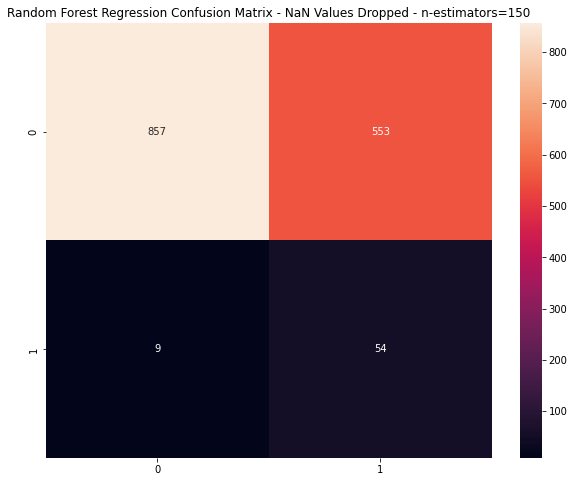

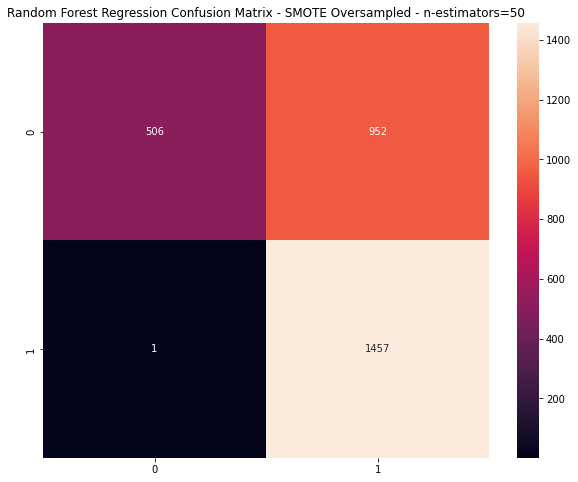

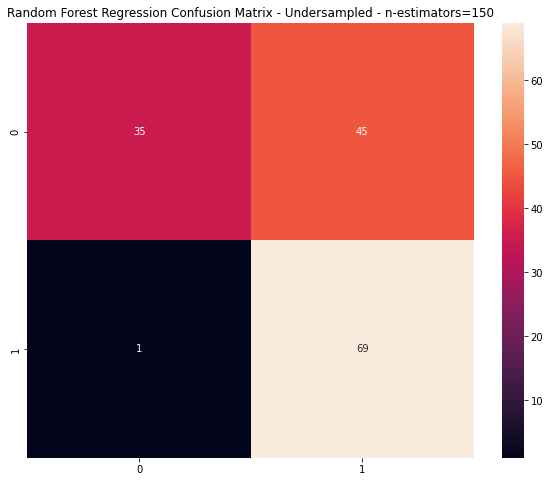

In [119]:
rf_model1 = create_forest_classifier(x_train_dropped, y_train_dropped, 125)
rf_model2 = create_forest_classifier(oversampled_x_train, oversampled_y_train, 50)
rf_model3 = create_forest_classifier(undersampled_x_train, undersampled_y_train, 125)

rf_model_1_pred = rf_model1.predict(x_test_dropped)
rf_model_1_conf = confusion_matrix(y_test_dropped, rf_model_1_pred)
plt.figure(figsize=(10, 8))
plt.title("Random Forest Regression Confusion Matrix - NaN Values Dropped - n-estimators=150")
plt.xlabel("Predicted Value")
sns.heatmap(rf_model_1_conf, annot=True, fmt="d")

rf_model_2_pred = rf_model2.predict(oversampled_x_test)
rf_model_2_conf = confusion_matrix(oversampled_y_test, rf_model_2_pred)
plt.figure(figsize=(10, 8))
plt.title("Random Forest Regression Confusion Matrix - SMOTE Oversampled - n-estimators=50")
plt.xlabel("Predicted Value")
sns.heatmap(rf_model_2_conf, annot=True, fmt="d")

rf_model_3_pred = rf_model3.predict(undersampled_x_test)
rf_model_3_conf = confusion_matrix(undersampled_y_test, rf_model_3_pred)
plt.figure(figsize=(10, 8))
plt.title("Random Forest Regression Confusion Matrix - Undersampled - n-estimators=150")
plt.xlabel("Predicted Value")
sns.heatmap(rf_model_3_conf, annot=True, fmt="d")

Establishing further accuracy metrics for Random Forest

In [120]:
randforclass_cv_score_1 = cross_val_score(
    rf_model1, dropped_data, dropped_stroke_values, cv=10, scoring="roc_auc"
)
print("=== Classification Report ===")
print(classification_report(y_test_dropped, rf_model_1_pred))
print("\n")
print("=== All AUC Scores ===")
print(randforclass_cv_score_1)
print("\n")
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", randforclass_cv_score_1.mean())
randforclass_cv_score_2 = cross_val_score(
    rf_model2, oversampled_x, oversampled_y, cv=10, scoring="roc_auc"
)
print("=== Classification Report ===")
print(classification_report(oversampled_y_test, rf_model_2_pred))
print("\n")
print("=== All AUC Scores ===")
print(randforclass_cv_score_2)
print("\n")
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", randforclass_cv_score_2.mean())
randforclass_cv_score_3 = cross_val_score(
    rf_model3, undersampled_x, undersampled_y, cv=10, scoring="roc_auc"
)
print("=== Classification Report ===")
print(classification_report(undersampled_y_test, rf_model_3_pred))
print("\n")
print("=== All AUC Scores ===")
print(randforclass_cv_score_3)
print("\n")
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", randforclass_cv_score_3.mean())

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.61      0.75      1410
           1       0.09      0.86      0.16        63

    accuracy                           0.62      1473
   macro avg       0.54      0.73      0.46      1473
weighted avg       0.95      0.62      0.73      1473



=== All AUC Scores ===
[0.85628166 0.82588652 0.83424519 0.83586626 0.76139818 0.89270517
 0.82922999 0.81975684 0.85363996 0.7662234 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8275233175200851
=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.35      0.52      1458
           1       0.60      1.00      0.75      1458

    accuracy                           0.67      2916
   macro avg       0.80      0.67      0.63      2916
weighted avg       0.80      0.67      0.63      2916



=== All AUC Scores ===
[0.78388923 0.81579493 0.80409067 0.78572668 0

Creating Logistic regression model using mean and SMOTE oversampled dataset

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Dropped Data,0.949119,0.4,0.025974,0.04878


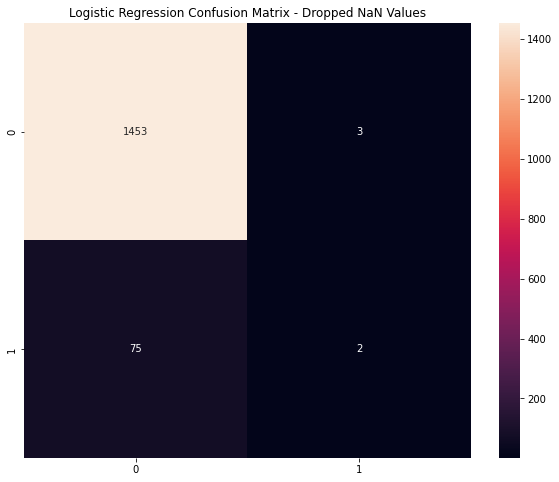

In [121]:
mean_lr_model = LogisticRegression(random_state=0, penalty="none")
mean_lr_model.fit(x_train_mean, y_train_mean)
mean_lr_y_pred = mean_lr_model.predict(x_test_mean)

accuracy = accuracy_score(y_test_mean, mean_lr_y_pred)
precision = precision_score(y_test_mean, mean_lr_y_pred)
recall = recall_score(y_test_mean, mean_lr_y_pred)
score = f1_score(y_test_mean, mean_lr_y_pred)
output = pd.DataFrame(
    [[f"Logistic Regression " + str("Dropped Data"), accuracy, precision, recall, score]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
mean_lr_conf = confusion_matrix(y_test_mean, mean_lr_y_pred)
plt.figure(figsize=(10, 8))
plt.title("Logistic Regression Confusion Matrix - Dropped NaN Values")
plt.xlabel("Predicted Value")
sns.heatmap(mean_lr_conf, annot=True, fmt="d")
output

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Oversampled Data,0.799383,0.791194,0.813443,0.802164


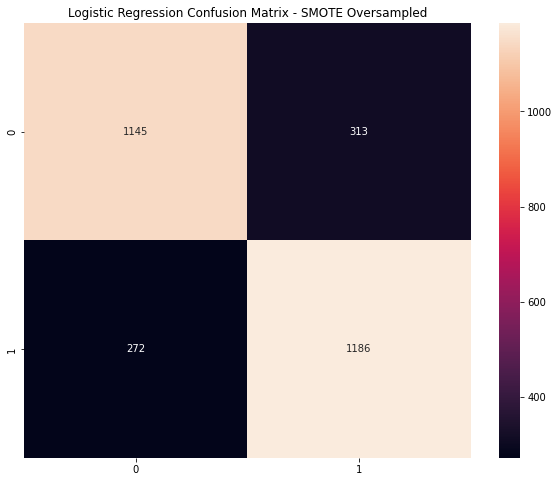

In [122]:
oversampled_lr_model = LogisticRegression(random_state=0, penalty="none")
oversampled_lr_model.fit(oversampled_x_train, oversampled_y_train)
oversampled_lr_y_pred = oversampled_lr_model.predict(oversampled_x_test)

accuracy = accuracy_score(oversampled_y_test, oversampled_lr_y_pred)
precision = precision_score(oversampled_y_test, oversampled_lr_y_pred)
recall = recall_score(oversampled_y_test, oversampled_lr_y_pred)
score = f1_score(oversampled_y_test, oversampled_lr_y_pred)
output = pd.DataFrame(
    [[f"Logistic Regression " + str("Oversampled Data"), accuracy, precision, recall, score]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
dropped_lr_conf = confusion_matrix(oversampled_y_test, oversampled_lr_y_pred)
plt.figure(figsize=(10, 8))
plt.title("Logistic Regression Confusion Matrix - SMOTE Oversampled")
plt.xlabel("Predicted Value")
sns.heatmap(dropped_lr_conf, annot=True, fmt="d")
output

Repeating previous work using Recursive Feature Elimination

[False  True  True  True False False False False False  True]
[4 1 1 1 3 2 7 5 6 1]


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Dropped Data (RFE),0.95723,0.0,0.0,0.0


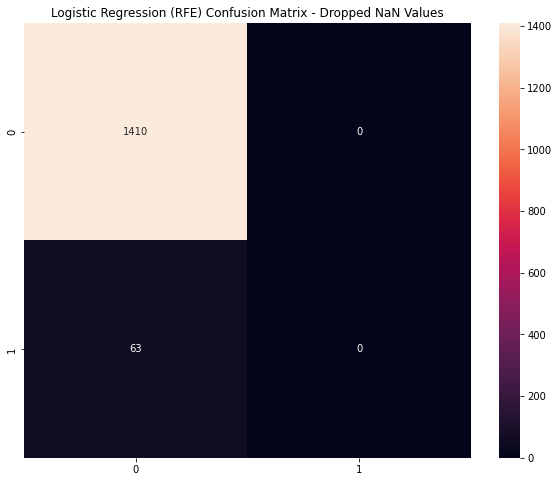

In [123]:
mean_rfe_logreg = LogisticRegression(random_state=0, penalty="l2")
mean_rfe = RFE(mean_rfe_logreg, step=1, n_features_to_select=4)
mean_rfe = mean_rfe.fit(dropped_data, dropped_stroke_values.values.ravel())
print(mean_rfe.support_)
print(mean_rfe.ranking_)
x_train_dropped.columns[mean_rfe.support_]

mean_lr_model_rfe = LogisticRegression(random_state=0, penalty="none")
mean_lr_model_rfe.fit(x_train_dropped[x_train_dropped.columns[mean_rfe.support_]], y_train_dropped)
mean_lr_y_pred_rfe = mean_lr_model_rfe.predict(
    x_test_dropped[x_test_dropped.columns[mean_rfe.support_]]
)

accuracy = accuracy_score(y_test_dropped, mean_lr_y_pred_rfe)
precision = precision_score(y_test_dropped, mean_lr_y_pred_rfe)
recall = recall_score(y_test_dropped, mean_lr_y_pred_rfe)
score = f1_score(y_test_dropped, mean_lr_y_pred_rfe)
output = pd.DataFrame(
    [[f"Logistic Regression " + str("Dropped Data (RFE)"), accuracy, precision, recall, score]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
mean_lr_conf_rfe = confusion_matrix(y_test_dropped, mean_lr_y_pred_rfe)
plt.figure(figsize=(10, 8))
plt.title("Logistic Regression (RFE) Confusion Matrix - Dropped NaN Values")
plt.xlabel("Predicted Value")
sns.heatmap(mean_lr_conf_rfe, annot=True, fmt="d")
output

[ True False False False  True  True  True False False False]
[1 5 4 3 1 1 1 6 7 2]


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Dropped Data (RFE),0.632716,0.626059,0.659122,0.642165


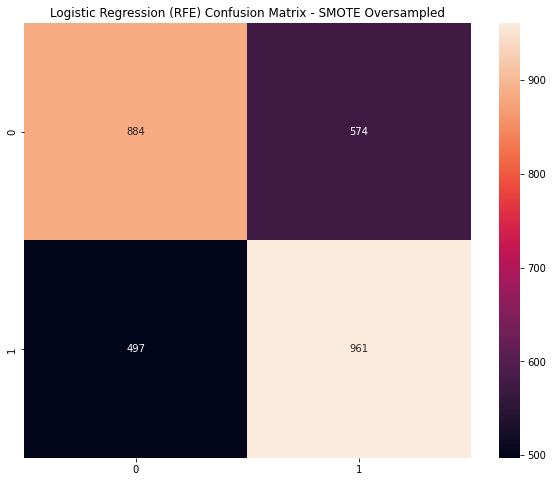

In [124]:
oversampled_rfe_logreg = LogisticRegression(random_state=0, penalty="l2")
oversampled_rfe = RFE(oversampled_rfe_logreg, step=1, n_features_to_select=4)
rfe = oversampled_rfe.fit(oversampled_x, oversampled_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
oversampled_x_train.columns[rfe.support_]

oversampled_lr_model_rfe = LogisticRegression(random_state=0, penalty="none")
oversampled_lr_model_rfe.fit(
    oversampled_x_train[oversampled_x_train.columns[rfe.support_]], oversampled_y_train
)
oversampled_lr_y_pred_rfe = oversampled_lr_model_rfe.predict(
    oversampled_x_test[oversampled_x_test.columns[rfe.support_]]
)

accuracy = accuracy_score(oversampled_y_test, oversampled_lr_y_pred_rfe)
precision = precision_score(oversampled_y_test, oversampled_lr_y_pred_rfe)
recall = recall_score(oversampled_y_test, oversampled_lr_y_pred_rfe)
score = f1_score(oversampled_y_test, oversampled_lr_y_pred_rfe)
output = pd.DataFrame(
    [[f"Logistic Regression " + str("Dropped Data (RFE)"), accuracy, precision, recall, score]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
oversampled_lr_conf_rfe = confusion_matrix(oversampled_y_test, oversampled_lr_y_pred_rfe)
plt.figure(figsize=(10, 8))
plt.title("Logistic Regression (RFE) Confusion Matrix - SMOTE Oversampled")
plt.xlabel("Predicted Value")
sns.heatmap(oversampled_lr_conf_rfe, annot=True, fmt="d")
output

Adding linear regression models on mean and oversampled data

The r2 Score is:  -0.04468085106382991
The MSE is:  0.04276985743380855
The RMSE is: 0.20680874602832577
The MAE is:  0.04276985743380855


,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,0.95723,0.0,0.0,0.0


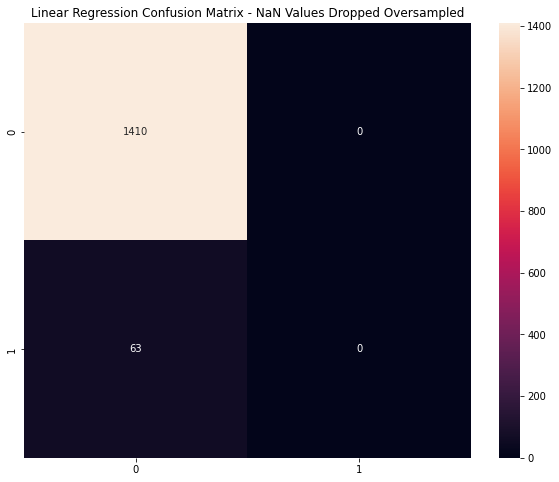

In [125]:
linreg_mean = LinearRegression()
linreg_mean.fit(x_train_dropped, y_train_dropped)
linreg_y_prediction_mean = linreg_mean.predict(x_test_dropped)
linreg_y_prediction_rounded_mean = np.round(linreg_y_prediction_mean, 0)
r2score_dropped = r2_score(y_test_dropped, linreg_y_prediction_rounded_mean)
print("The r2 Score is: ", r2score_dropped)
print("The MSE is: ", mean_squared_error(y_test_dropped, linreg_y_prediction_rounded_mean))
print(
    "The RMSE is:",
    np.sqrt(mean_squared_error(y_test_dropped, linreg_y_prediction_rounded_mean)),
)
print("The MAE is: ", mean_absolute_error(y_test_dropped, linreg_y_prediction_rounded_mean))
accuracy = accuracy_score(y_test_dropped, linreg_y_prediction_rounded_mean)
precision = precision_score(y_test_dropped, linreg_y_prediction_rounded_mean)
recall = recall_score(y_test_dropped, linreg_y_prediction_rounded_mean)
score = f1_score(y_test_dropped, linreg_y_prediction_rounded_mean)
output = pd.DataFrame(
    [[f"Linear Regression", accuracy, precision, recall, score]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
mean_linreg_conf = confusion_matrix(y_test_dropped, linreg_y_prediction_rounded_mean)
plt.figure(figsize=(10, 8))
plt.title("Linear Regression Confusion Matrix - NaN Values Dropped Oversampled")
plt.xlabel("Predicted Value")
sns.heatmap(mean_linreg_conf, annot=True, fmt="d")
output

The r2 Score is:  0.19067215363511658
The MSE is:  0.20233196159122085
The RMSE is: 0.4498132519070785
The MAE is:  0.20233196159122085


,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,0.797668,0.781453,0.826475,0.803333


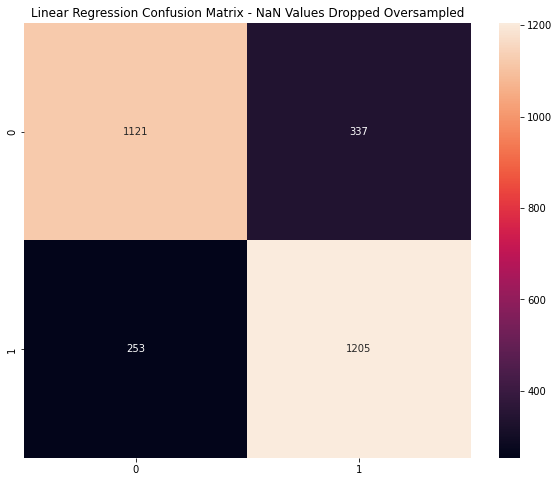

In [126]:
linreg_oversampled = LinearRegression()
linreg_oversampled.fit(oversampled_x_train, oversampled_y_train)
linreg_y_prediction_oversampled = linreg_oversampled.predict(oversampled_x_test)
linreg_y_prediction_rounded_oversampled = np.round(linreg_y_prediction_oversampled, 0)
r2score_oversampled = r2_score(oversampled_y_test, linreg_y_prediction_rounded_oversampled)
print("The r2 Score is: ", r2score_oversampled)
print(
    "The MSE is: ", mean_squared_error(oversampled_y_test, linreg_y_prediction_rounded_oversampled)
)
print(
    "The RMSE is:",
    np.sqrt(mean_squared_error(oversampled_y_test, linreg_y_prediction_rounded_oversampled)),
)
print(
    "The MAE is: ",
    mean_absolute_error(oversampled_y_test, linreg_y_prediction_rounded_oversampled),
)
accuracy = accuracy_score(oversampled_y_test, linreg_y_prediction_rounded_oversampled)
precision = precision_score(oversampled_y_test, linreg_y_prediction_rounded_oversampled)
recall = recall_score(oversampled_y_test, linreg_y_prediction_rounded_oversampled)
score = f1_score(oversampled_y_test, linreg_y_prediction_rounded_oversampled)
output = pd.DataFrame(
    [[f"Linear Regression", accuracy, precision, recall, score]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
)
oversampled_linreg_conf = confusion_matrix(
    oversampled_y_test, linreg_y_prediction_rounded_oversampled
)
plt.figure(figsize=(10, 8))
plt.title("Linear Regression Confusion Matrix - NaN Values Dropped Oversampled")
plt.xlabel("Predicted Value")
sns.heatmap(oversampled_linreg_conf, annot=True, fmt="d")
output

Creating KNN Gridsearch to determine best N for model application

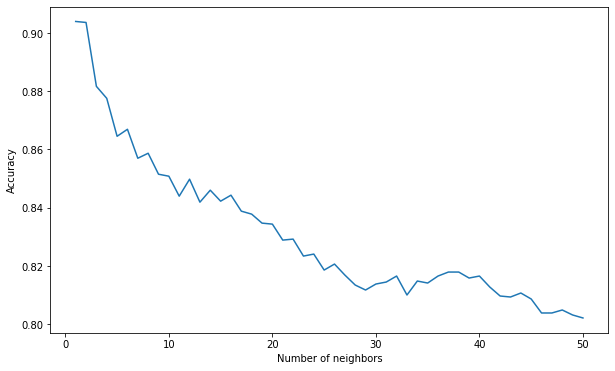

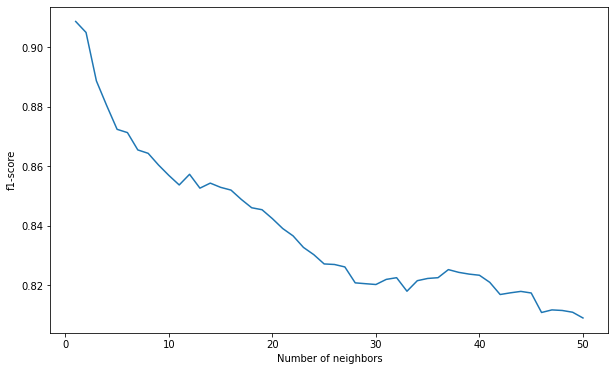

   No. Neighbours  Pred Accuracy  f1-Score
0               1       0.903978  0.908735


In [127]:
neighbors = []
scores = []
f1_scores = []

# test classifier range
for k in range(1, 51, 1):
    neighbors.append(k)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(oversampled_x_train, oversampled_y_train)
    score_new = knn_classifier.score(oversampled_x_test, oversampled_y_test)
    scores.append(score_new)

    preds = knn_classifier.predict(oversampled_x_test)
    f1_score_new = f1_score(oversampled_y_test, preds)
    f1_scores.append(f1_score_new)

# plot accuracy versus k
plt.figure(figsize=(10, 6))
sns.lineplot(x=neighbors, y=scores)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

# plot f1-score versus k
plt.figure(figsize=(10, 6))
sns.lineplot(x=neighbors, y=f1_scores)
plt.xlabel("Number of neighbors")
plt.ylabel("f1-score")
plt.show()

neighbours_df = pd.DataFrame(neighbors, columns=["No. Neighbours"])
accuracy = pd.DataFrame(scores, columns=["Pred Accuracy"])
scores_df = pd.DataFrame(f1_scores, columns=["f1-Score"])
output_df = pd.concat([neighbours_df, accuracy, scores_df], axis=1)
print(output_df[output_df["f1-Score"] == output_df["f1-Score"].max()])

<AxesSubplot:title={'center':'KNN Confidence Matrix (K=13) Using SMOTE Oversampled Data'}>

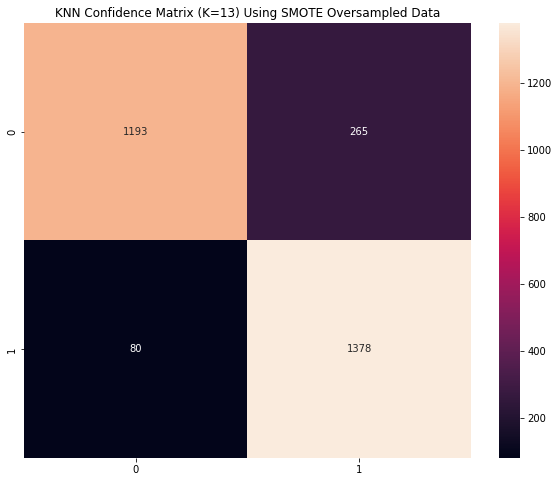

In [128]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(oversampled_x_train, oversampled_y_train)
knn_preds = knn_model.predict(oversampled_x_test)
knn_conf_matrix = confusion_matrix(oversampled_y_test, knn_preds)
knn_score = knn_model.score(oversampled_x_test, oversampled_y_test)

plt.figure(figsize=(10, 8))
plt.title("KNN Confidence Matrix (K=13) Using SMOTE Oversampled Data")
sns.heatmap(knn_conf_matrix, annot=True, fmt="d")

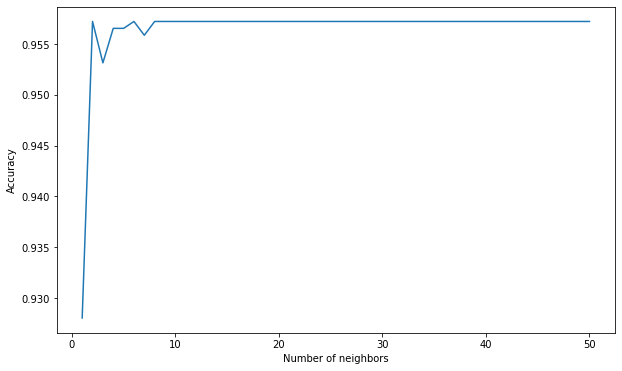

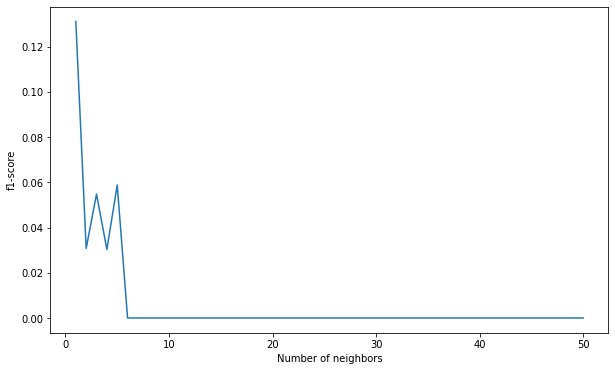

   No. Neighbours  Pred Accuracy  f1-Score
0               1       0.928038  0.131148


In [129]:
neighbors = []
scores = []
f1_scores = []

for k in range(1, 51, 1):
    neighbors.append(k)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train_dropped, y_train_dropped)
    score_new = knn_classifier.score(x_test_dropped, y_test_dropped)
    scores.append(score_new)

    preds = knn_classifier.predict(x_test_dropped)
    f1_score_new = f1_score(y_test_dropped, preds)
    f1_scores.append(f1_score_new)

# plot accuracy versus k
plt.figure(figsize=(10, 6))
sns.lineplot(x=neighbors, y=scores)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

# plot f1-score versus k
plt.figure(figsize=(10, 6))
sns.lineplot(x=neighbors, y=f1_scores)
plt.xlabel("Number of neighbors")
plt.ylabel("f1-score")
plt.show()

neighbours_df = pd.DataFrame(neighbors, columns=["No. Neighbours"])
accuracy = pd.DataFrame(scores, columns=["Pred Accuracy"])
scores_df = pd.DataFrame(f1_scores, columns=["f1-Score"])
output_df = pd.concat([neighbours_df, accuracy, scores_df], axis=1)
print(output_df[output_df["f1-Score"] == output_df["f1-Score"].max()])

<AxesSubplot:title={'center':'KNN Confidence Matrix (K=1) using dropped  Data'}>

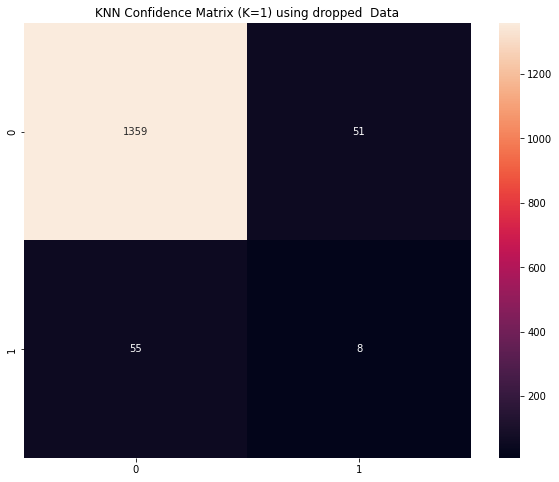

In [130]:
knn_model_dropped = KNeighborsClassifier(n_neighbors=1)
knn_model_dropped.fit(x_train_dropped, y_train_dropped)
knn_preds_dropped = knn_model_dropped.predict(x_test_dropped)
knn_conf_matrix_dropped = confusion_matrix(y_test_dropped, knn_preds_dropped)
knn_score_dropped = knn_model_dropped.score(x_test_dropped, y_test_dropped)

plt.figure(figsize=(10, 8))
plt.title("KNN Confidence Matrix (K=1) using dropped  Data")
sns.heatmap(knn_conf_matrix_dropped, annot=True, fmt="d")
